In [1]:
import random
import collections
import matplotlib.pyplot as plt

In [15]:
def biased_coin(bias=0.51): return random.random() < bias

In [21]:
100000 * 16

1600000

In [135]:
n = 200000000
cc = collections.Counter(biased_coin() for _ in range(n))
print('False:', cc[False] / n) # tails
print('True:' , cc[True ] / n) # heads

False: 0.489975495
True: 0.510024505


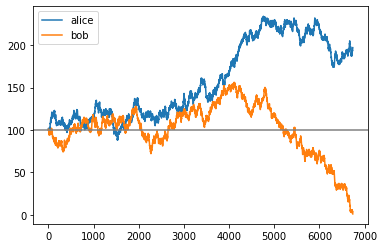

In [133]:
# 2 different coins

alice = 100
bob   = 100

A, B = [], []

while alice > 0 and bob > 0:
    A.append(alice)
    B.append(bob)
    
    if biased_coin():
        alice += 1
    else:
        alice -= 1
        
    if biased_coin():
        bob -= 1
    else:
        bob += 1
        
plt.plot(A, label='alice')
plt.plot(B, label='bob')
plt.axhline(100, color='gray')
plt.legend()

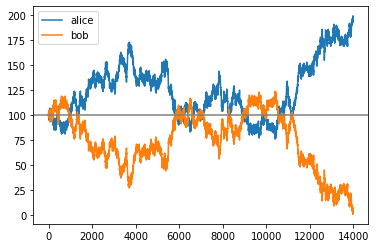

In [128]:
# same coin

alice = 100
bob   = 100
A, B = [], []

while alice > 0 and bob > 0:
    A.append(alice)
    B.append(bob)
    if biased_coin():
        alice += 1
        bob -= 1
    else:
        alice -= 1
        bob += 1

plt.plot(A, label='alice')
plt.plot(B, label='bob')
plt.axhline(100, color='gray')
plt.legend()

In [12]:
from pipe import * # github.com/tandav/pipe
import operator

In [19]:
def count_brokes(dummy, n_simulations=1000):
    brokes = collections.Counter()
    
    for _ in range(n_simulations):
        alice = 100
        bob   = 100

        while alice > 0 and bob > 0:
            if biased_coin(): alice += 1
            else: alice -= 1

            if biased_coin(): bob -= 1
            else: bob += 1

        if alice == 0: brokes['alice'] += 1
        else: brokes['alice'] += 1
        return brokes

In [20]:
n_threads = 8
range(n_threads) | ProcessMap(count_brokes) | Pipe(list)

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [6]:
n_simulations = 1000
brokes = collections.Counter()

for _ in range(n_simulations):
    alice = 100
    bob   = 100

    while alice > 0 and bob > 0:
        if biased_coin(): alice += 1
        else: alice -= 1

        if biased_coin(): bob -= 1
        else: bob += 1
            
    if alice == 0: brokes['alice'] += 1
    else: brokes['alice'] += 1
brokes

Counter({'alice': 1000})